# Imbalanced data

**To detect problem with imbalanced data, check for prediciton results, specific confusion matrix and recall**

- Undersampling: samples of majority of class

    - It loses data

- Oversampling: copies of the minority class

    - Synthetic samples

## Undersampling: Tomek Links

Erase sample/data of one group too close to the other group, which may confuses the model.

<img src=".\theory\tomek.png"  style="width: 600px;"/>

## Oversampling: Smote

Synthetic samples: create new data for one group close to this group.


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [73]:
census_data = pd.read_csv('census.csv')
census_data

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
np.unique(census_data['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

<Axes: xlabel='income', ylabel='percent'>

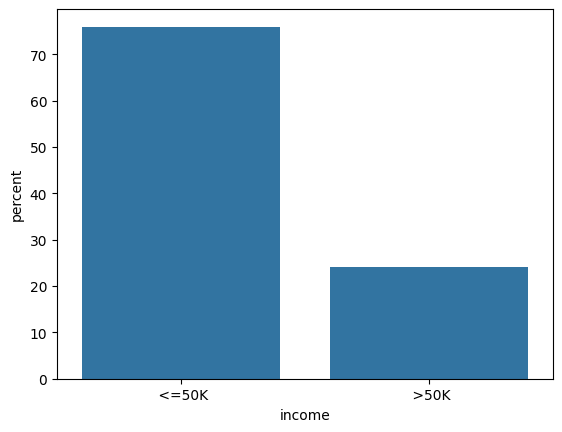

In [9]:
sns.countplot(x=census_data['income'], stat='percent')

In [74]:
x_census = census_data.iloc[:,0:14].values
x_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [11]:
y_census = census_data.iloc[:,14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [16]:
census_data.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [75]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation   = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex  = LabelEncoder()
label_encoder_country = LabelEncoder()

In [76]:
x_census[:,1] = label_encoder_workclass.fit_transform(x_census[:,1])
x_census[:,3] = label_encoder_education.fit_transform(x_census[:,3])
x_census[:,5] = label_encoder_marital.fit_transform(x_census[:,5])
x_census[:,6] = label_encoder_occupation.fit_transform(x_census[:,6])
x_census[:,7] = label_encoder_relationship.fit_transform(x_census[:,7])
x_census[:,8] = label_encoder_race.fit_transform(x_census[:,8])
x_census[:,9] = label_encoder_sex.fit_transform(x_census[:,9])
x_census[:,13] = label_encoder_country.fit_transform(x_census[:,13])

In [77]:
x_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

# Undersampling - Tomek Links

In [21]:
from imblearn.under_sampling import TomekLinks

In [88]:
tl = TomekLinks(sampling_strategy='all')

x_under, y_under = tl.fit_resample(x_census,y_census)

In [89]:
x_under.shape, y_under.shape

((27763, 14), (27763,))

In [80]:
x_census.shape,y_census.shape

((32561, 14), (32561,))

In [90]:
np.unique(y_under, return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([22321,  5442], dtype=int64))

In [49]:
np.unique(y_census, return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

In [91]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(),[1,3,5,6,7,8,9,13])],
                                                 remainder='passthrough')
x_under = onehotencoder.fit_transform(x_under).toarray()
x_under

array([[    0.,     0.,     0., ...,  2174.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       ...,
       [    0.,     0.,     0., ...,     0.,     0.,    40.],
       [    0.,     0.,     0., ...,     0.,     0.,    20.],
       [    0.,     0.,     0., ..., 15024.,     0.,    40.]])

In [92]:
x_under.shape

(27763, 108)

In [93]:
from sklearn.model_selection import train_test_split
x_under_training, x_under_test, y_under_training, y_under_test = train_test_split(x_under,y_under,
                                                                                      test_size = 0.15,
                                                                                      random_state = 0)

## Random forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
random_f_census = RandomForestClassifier(criterion='entropy',
                                         min_samples_leaf=1,
                                         min_samples_split=5,
                                         n_estimators=100)
random_f_census.fit(x_under_training,y_under_training)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [95]:
from sklearn.metrics import accuracy_score
prediction = random_f_census.predict(x_under_test)
accuracy_score(y_under_test,prediction)

0.8960384153661465

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_under_test, prediction))

              precision    recall  f1-score   support

       <=50K       0.92      0.96      0.94      3347
        >50K       0.79      0.64      0.71       818

    accuracy                           0.90      4165
   macro avg       0.85      0.80      0.82      4165
weighted avg       0.89      0.90      0.89      4165



# Oversampling - Smote

In [60]:
census_data = pd.read_csv('census.csv')

x_census = census_data.iloc[:,0:14].values

label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation   = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex  = LabelEncoder()
label_encoder_country = LabelEncoder()

x_census[:,1] = label_encoder_workclass.fit_transform(x_census[:,1])
x_census[:,3] = label_encoder_education.fit_transform(x_census[:,3])
x_census[:,5] = label_encoder_marital.fit_transform(x_census[:,5])
x_census[:,6] = label_encoder_occupation.fit_transform(x_census[:,6])
x_census[:,7] = label_encoder_relationship.fit_transform(x_census[:,7])
x_census[:,8] = label_encoder_race.fit_transform(x_census[:,8])
x_census[:,9] = label_encoder_sex.fit_transform(x_census[:,9])
x_census[:,13] = label_encoder_country.fit_transform(x_census[:,13])

In [61]:
x_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [39]:
from imblearn.over_sampling import SMOTE

In [62]:
smote = SMOTE(sampling_strategy='minority')
x_over, y_over = smote.fit_resample(x_census,y_census)

In [63]:
x_over.shape, y_over.shape

((49440, 14), (49440,))

In [57]:
x_census.shape,y_census.shape

((32561, 14), (32561,))

In [64]:
np.unique(y_over, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720, 24720], dtype=int64))

In [59]:
np.unique(y_census, return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

In [50]:
# not run because of memory usage limit

#onehotencoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(),[1,3,5,6,7,8,9,13])],
#                                                 remainder='passthrough')
#x_over = onehotencoder.fit_transform(x_over).toarray()
#x_over

array([[   0.        ,    0.        ,    0.        , ..., 2174.        ,
           0.        ,   40.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   13.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   40.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   42.5102007 ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   58.80069584],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,   44.01919042]])

In [65]:
x_over_training, x_over_test, y_over_training, y_over_test = train_test_split(x_over,y_over,
                                                                                      test_size = 0.15,
                                                                                      random_state = 0)

In [68]:
random_f_census = RandomForestClassifier(criterion='entropy',
                                         min_samples_leaf=1,
                                         min_samples_split=5,
                                         n_estimators=100)
random_f_census.fit(x_over_training,y_over_training)

RandomForestClassifier(criterion='entropy', min_samples_split=5)

In [69]:
prediction = random_f_census.predict(x_over_test)
accuracy_score(y_over_test,prediction)

0.9085760517799353

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_over_test, prediction))

              precision    recall  f1-score   support

       <=50K       0.90      0.93      0.91      3722
        >50K       0.92      0.89      0.91      3694

    accuracy                           0.91      7416
   macro avg       0.91      0.91      0.91      7416
weighted avg       0.91      0.91      0.91      7416

